# Pittsburgh Parks

For my metric, I looked at the parks in Pittsburgh. To determine the best neighborhood to be a dog owner in, we will be considering the number of parks in each neighborhood. 

Having multiple parks around helps to keep your dog happy and stimulated on walks, and it will provide them with plenty of space to run around in and explore during playtime. If a neighborhood has *enough* parks or is close to another neighborhood with many parks, if it's the best choice considering the metrics chosen by the other groupmates, it would still be considered a good choice even if it's not the one with the *most* parks, since parks aren't the only factor we'll be considering in deciding what the best neighborhood in Pittsburgh is.

### Data and Code

I started by importing the necessary packages and reading in the data for all of the parks in Pittsburgh. 

In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

data = pd.read_csv("parks.csv", header=0)
data.head()

,id,name,type,maintenance_responsibility,image,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,2111959181,Able Long Park,Park,Parks - Southern,https://tools.wprdc.org/images/pittsburgh/park...,Beechview,4,19,42003192000,5,19,6,4-28,40.408118,-80.028197
1,1109513049,Albert Turk Graham Park,Park,Parks - Schenley,https://tools.wprdc.org/images/pittsburgh/park...,Crawford-Roberts,6,3,42003030500,3,3,2,2-1,40.440507,-79.984018
2,1544096765,Alcoa Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447481,-80.001017
3,1212681573,Allegheny Commons,Park,Parks - Northern,NaN,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.453126,-80.009158
4,954863286,Allegheny Landing Park,Park,Parks - Northern,NaN,North Shore,1,22,42003563200,6,22,1,1-20,40.447184,-80.002907


The above is what the data initially looked like. I then grouped the data by neighborhood and used the `count()` function to count the number of values that fall within each data type for each neighborhood.

In [3]:
nbr_data = data.groupby("neighborhood").count()
nbr_data

,id,name,type,maintenance_responsibility,image,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
neighborhood,,,,,,,,,,,,,,
Allegheny Center,2,2,2,2,0,2,2,2,2,2,2,2,2,2
Allentown,2,2,2,2,0,2,2,2,2,2,2,2,2,2
Arlington,1,1,1,1,0,1,1,1,1,1,1,1,1,1
Banksville,2,2,2,2,0,2,2,2,2,2,2,2,2,2
Bedford Dwellings,1,1,1,1,0,1,1,1,1,1,1,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Upper Lawrenceville,3,3,3,3,2,3,3,3,3,3,3,3,3,3
West End,2,2,2,2,0,2,2,2,2,2,2,2,2,2
West Oakland,1,1,1,1,0,1,1,1,1,1,1,1,1,1


Though this data is better, it doesn't narrow anything down and it's still a long list. Note that the values for `id` and `name` are all the same for each neighborhood. There are other values that are the same as well, but these three are the easiest to narrow the data down by because the idea is simpler to understand intuitively. Each park will have its own unique name and its own unique ID. So by finding how many of these values there are for each neighborhood, we are also counting the *the number of parks* in each neighborhood.

Taking this into consideration, I filtered out every neighborhood that has less than 3 parks in it, using a function similar to the one we used in one of the lectures. The data is now much easier to read and has been narrowed down conveniently.

In [36]:
def findLarge(groups, threshold):
    if(len(groups) < threshold):
        return False
    else:
        return True
    
most_parks = data.groupby("neighborhood").filter(findLarge, threshold=3)
most_parks = most_parks.groupby("neighborhood").count()
most_parks

,id,name,type,maintenance_responsibility,image,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
neighborhood,,,,,,,,,,,,,,
Beechview,8,8,8,8,3,8,8,8,8,8,8,8,8,8
Beltzhoover,3,3,3,3,1,3,3,3,3,3,3,3,3,3
Bloomfield,3,3,3,3,2,3,3,3,3,3,3,3,3,3
Brighton Heights,4,4,4,4,2,4,4,4,4,4,4,4,4,4
Brookline,3,3,3,3,0,3,3,3,3,3,3,3,3,3
Carrick,3,3,3,3,0,3,3,3,3,3,3,3,3,3
Central Business District,10,10,10,10,4,10,10,10,10,10,10,10,10,10
Central Northside,3,3,3,3,2,3,3,3,3,3,3,3,3,3
Central Oakland,4,4,4,4,2,4,4,4,4,4,4,4,4,4


To make the table less convoluted, I picked one of the columns to keep displayed and essentially cropped the others out. Now the table is simple and easy to understand.

In [37]:
most_parks_sorted = most_parks.iloc[:, 1:2]
most_parks_sorted

,name
neighborhood,
Beechview,8
Beltzhoover,3
Bloomfield,3
Brighton Heights,4
Brookline,3
Carrick,3
Central Business District,10
Central Northside,3
Central Oakland,4


For the final touch to the table, I renamed the column to "Number of Parks" so readers can more simply understand the table, without having to understand why or how the number was reached if they want to avoid confusion. I also sorted the table by the number of parks in ascending order, rather than sorting it by the neighborhood names alphabetically, since that is the focus of the table.

In [38]:
most_parks_sorted = most_parks_sorted.sort_values(by="name")
most_parks_sorted = most_parks_sorted.rename(columns={"name":"Number of Parks"})
most_parks_sorted

,Number of Parks
neighborhood,
Lincoln-Lemington-Belmar,3
Swisshelm Park,3
Spring Hill-City View,3
Point Breeze North,3
North Shore,3
Manchester,3
Lower Lawrenceville,3
Upper Lawrenceville,3
Larimer,3


Finally, I created a bar graph to plot the data out in a manner that is easier to understand visually. Albeit a little crowded, the graph does its job.

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f9652a1e550>],
      dtype=object)

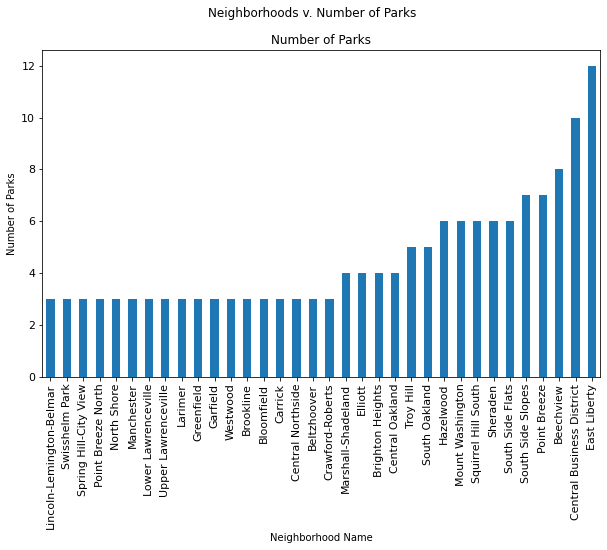

In [39]:
most_parks_sorted.plot(kind="bar", title="Neighborhoods v. Number of Parks", subplots=True,
                xlabel="Neighborhood Name", ylabel="Number of Parks", legend = False, figsize=(10, 6), fontsize=11)

This next section of the code shows the above data in map form, with each neighborhood being coloured correspondingly to its respective number of parks. This helps to see which neighborhoods are adjacent to the ones with many parks for later analysis. 

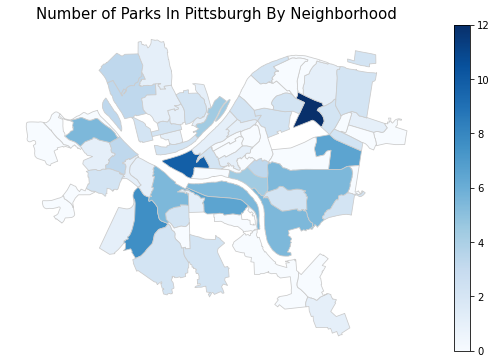

In [42]:
nbr = gpd.read_file("Neighborhoods/Neighborhoods_.shp")
mapdata = data.groupby("neighborhood").count()
merge = nbr.set_index("hood").join(mapdata.set_index("name"))
merge['num_parks'] = mapdata.name

fig, ax = plt.subplots(1, figsize=(10, 6))

merge.plot(column="num_parks", cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8')

#customize map by adding title, legend, etc.
ax.axis("off")
ax.set_title("Number of Parks In Pittsburgh By Neighborhood", fontdict={"fontsize": "15", "fontweight" : "2"})
sm = plt.cm.ScalarMappable(cmap="Blues", norm=plt.Normalize(vmin=0, vmax=12))
sm._A = []
cbar = fig.colorbar(sm)

### Conclusion

The neighborhood with the most parks is **East Liberty** with 12 parks, followed by **Central Business District** with 10 parks. **Beechview** is next with 8 parks, but there are two other neighborhoods with 7 parks and multiple neighborhoods with 6 parks, so it's not quite as separated from the rest of the data compared to East Liberty and Central Business District. There are a total of **34 neighborhoods** that contain three or more parks in them. While the best choices would be East Liberty and Central Business District, any of these 34 neighborhoods would still be great choices for dog owners to live in.